# Multi Layer Perceptron

### We will learn

- We implement [Bengio et al. 2003](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)
- We add non-linearity using Tanh activation funtion
    - We look at preactivations and activations in a forward pass

### Load Data

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [2]:
# read in all the words
words = open('data/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


### Building Dataset
- Create training samples each with a constant block length (context window)
- Create Training, Dev, and Test splits

In [5]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
# n1 = 20
# n2 = 30

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [6]:
# Xtr[0:10], Ytr[0:10]

### Initializing the network

- We implement [Bengio et al. 2003](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

In [7]:
g = torch.Generator().manual_seed(42) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

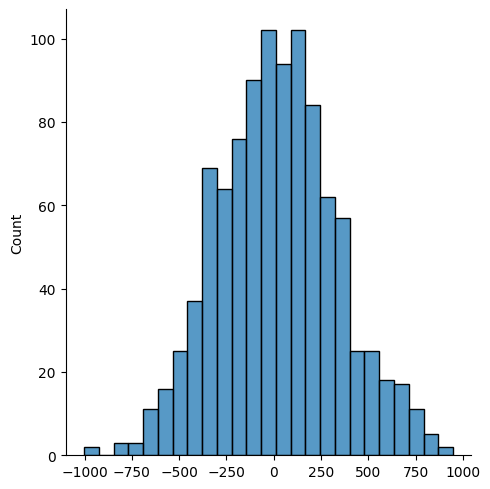

In [9]:
import seaborn as sns

dist1 = torch.randn((1000, 100000))
dist2 = torch.randn((100000, 1000))
dot = dist1 @ dist2
sns.displot(dot[0])

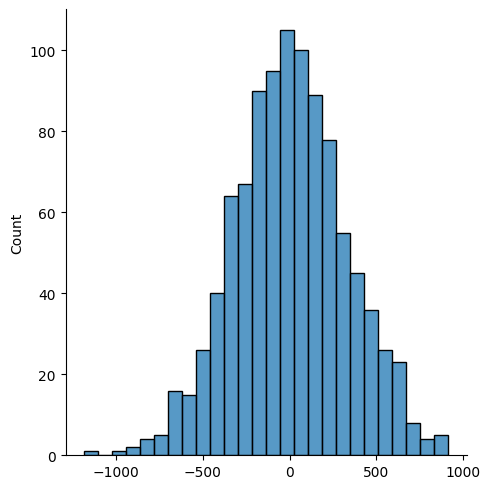

In [10]:
sns.displot(dot[:,0])

In [11]:
import pandas as pd
pd.Series(dot[0]).describe()

count    1000.000000
mean       17.696537
std       312.235321
min     -1002.364014
25%      -195.104755
50%        13.038826
75%       211.109776
max       947.841980
dtype: float64

In [12]:
pd.Series(dot[:,0]).describe()

count    1000.000000
mean        5.982236
std       322.428406
min     -1187.612671
25%      -206.502956
50%         3.812248
75%       209.775169
max       917.545532
dtype: float64

In [14]:
# dist[:,0]

In [ ]:
# sns.displot(dist1 @ dist2)

In [ ]:
m = dist1 * dist2

In [ ]:
n = dist1 @ dist2

In [ ]:
from scipy import stats
res = stats.shapiro(dist)
res

In [ ]:
sum(p.nelement() for p in parameters) # number of parameters in total

In [ ]:
for p in parameters:
  p.requires_grad = True

## Training

### Forward Pass

In [ ]:
# ix = torch.randint(0, Xtr.shape[0], (32,))   ### random sampling  ## We dont use the entire dataset in each iteration

In [8]:
# emb = C[Xtr[ix]]
emb = C[Xtr]
print(emb.shape)

torch.Size([182625, 3, 2])


In [9]:
concat_emb = emb.view(-1, 6)
concat_emb.shape

torch.Size([182625, 6])

In [10]:
concat_emb[0:3]

tensor([[ 1.9269,  1.4873,  1.9269,  1.4873,  1.9269,  1.4873],
        [ 1.9269,  1.4873,  1.9269,  1.4873, -1.0759,  0.5357],
        [ 1.9269,  1.4873, -1.0759,  0.5357,  1.8113,  0.1606]])

/tmp/ipykernel_1557677/4002090865.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(W1[0]), W1[0].shape


(<AxesSubplot: ylabel='Density'>, torch.Size([200]))

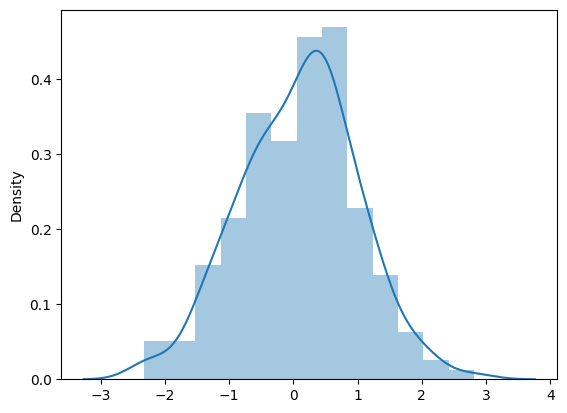

In [15]:
sns.distplot(W1[0]), W1[0].shape

In [16]:
h_hat = concat_emb @ W1 + b1

In [17]:
h_hat.shape

torch.Size([182625, 200])

/tmp/ipykernel_1557677/542567538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(h_hat[0])


<AxesSubplot: ylabel='Density'>

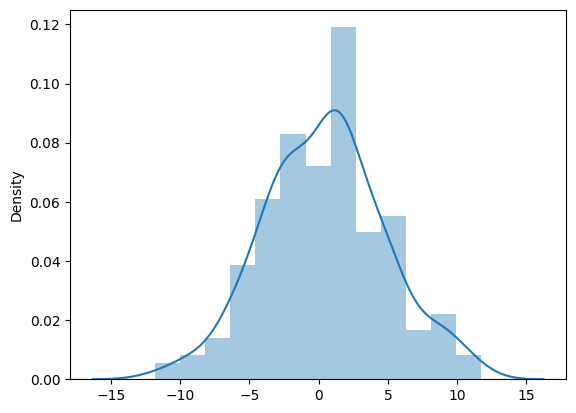

In [18]:
sns.distplot(h_hat[0])

/tmp/ipykernel_1557677/1041368926.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(torch.tanh(h_hat[0]))


<AxesSubplot: ylabel='Density'>

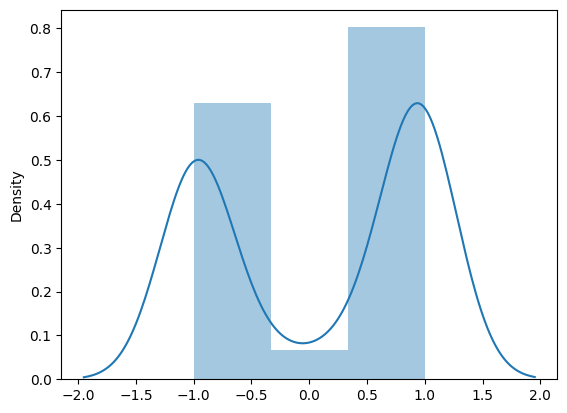

In [19]:
sns.distplot(torch.tanh(h_hat[0]))

In [ ]:
W1.shape

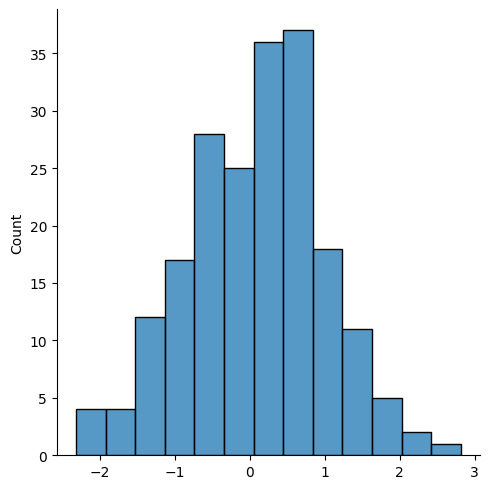

In [24]:
import seaborn as sns

sns.displot(W1[0].detach())

In [ ]:
import pandas as pd
pd.Series(b1.detach()).describe()

In [37]:
h = torch.tanh(h_hat) # (32, 100)
logits = h @ W2 + b2
print(logits.shape)

torch.Size([182625, 27])


/tmp/ipykernel_1557677/888559337.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logits[0])


<AxesSubplot: ylabel='Density'>

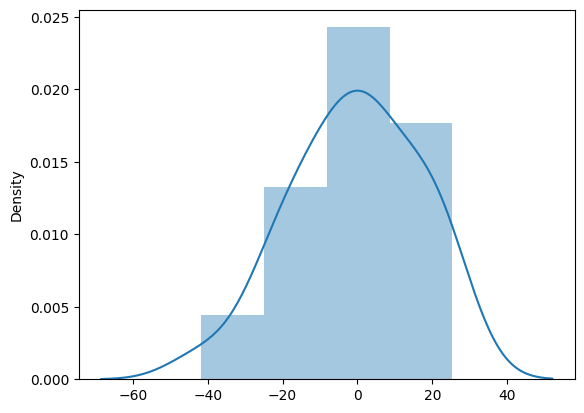

In [38]:
sns.distplot(logits[0])

In [39]:
Xtr.shape

torch.Size([182625, 3])

In [40]:
### Softmax
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character for the entire vocab size
print(probs.shape, Ytr.shape)

### negative log likelikood
loss_ = -probs[torch.arange(len(Ytr)), Ytr].log().mean()
print(loss_)

torch.Size([182625, 27]) torch.Size([182625])
tensor(25.0389)


In [41]:
# loss = F.cross_entropy(logits, Ytr)
# print(loss)

In [43]:
# sns.distplot(probs[torch.arange(len(Ytr)), Ytr], kde = True)

### Backward Pass

In [ ]:
#### Resetting initial grads to 
for p in parameters:
    p.grad = None

In [ ]:
### Backward Pass (compute new gradients based on the loss)
loss_.backward()

In [ ]:
### Update parameters (C, W, B) based on gradients
for p in parameters:
    p.data += -0.01 * p.grad

In [ ]:
-0.01 * p.grad[0]

### Complete Training loop (forward + backward pass)

In [44]:
lossi = []
stepi = []

In [ ]:
for i in range(200000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))   ### random sampling

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)

    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    if(i % 10000 == 0):
        print(loss)

    stepi.append(i)
    lossi.append(loss.log10().item())

In [ ]:
sum(lossi)/len(lossi)

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

In [ ]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

In [ ]:
### 3 features (30,200) model -> (2.114, 2.157)
### 3 features (150, 200) model -> (2.043, 2.137) overfitting since train and accuracies are separating
### 5 features (50, 200) model -> (2.182, 2.197)

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [ ]:
block_size = 3
context = [0] * block_size
C[torch.tensor([context])].shape

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(42)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

### How to Optimize this model further? 
- Easy optimization: Initialization